In [1]:
# Author: Arthur Prigent
# Email: aprigent@geomar.de

from load_librairies import *
import xscale.signal.fitting as xsf
import seaborn as sns
from sklearn import linear_model

def is_jja(month):
    return (month >= 6) & (month <= 8)

def is_amj(month):
    return (month >= 4) & (month <= 6)

def is_mjj(month):
    return (month >= 5) & (month <= 7)


def nandetrend(y):
    ''' Remove the linear trend from the data '''
    x = np.arange(0,y.shape[0],1)
    
    not_nan_ind = ~np.isnan(y)
    m, b, r_val, p_val, std_err = stats.linregress(x[not_nan_ind],np.array(y)[not_nan_ind])
    
    
    y_detrended= np.array(y) - m*x
    
    return y_detrended



def nandetrend2(y):
    ''' Remove the linear trend from the data '''
    x = np.arange(0,y.shape[0],1)
    
    not_nan_ind = ~np.isnan(y)
    m, b, r_val, p_val, std_err = stats.linregress(x[not_nan_ind],np.array(y)[not_nan_ind])
    
    
    y_detrended_tmp= np.array(y) - m*x
    
    y_detrended  = xr.Dataset({'detrended': (['time'],y_detrended_tmp)}
                       ,coords={'time':y.time[:]})
    return y_detrended

######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'

## SST variability changes in JJA

In [2]:

## SSTa ##
ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP5.nc')
ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'ssta_ssp5_monthly_CMIP5.nc')

ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP6.nc')
ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'ssta_ssp585_monthly_CMIP6.nc')



In [3]:
## std SSTa in JJA ##

std_ssta_hist_CMIP5_jja = ssta_atl3_hist_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip5['time.month'])).std(dim='time')

std_ssta_ssp5_CMIP5_jja = ssta_atl3_ssp5_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip5['time.month'])).std(dim='time')

std_ssta_hist_CMIP6_jja = ssta_atl3_hist_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip6['time.month'])).std(dim='time')

std_ssta_ssp5_CMIP6_jja = ssta_atl3_ssp5_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip6['time.month'])).std(dim='time')

std_ssta_changes_cmip6 = std_ssta_ssp5_CMIP6_jja - std_ssta_hist_CMIP6_jja
std_ssta_changes_cmip5 = std_ssta_ssp5_CMIP5_jja - std_ssta_hist_CMIP5_jja



##  ORA-S4 Z20 JJA in the ATL3

In [4]:
dir_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Data/'
data     = dir_data + 'ORA-S4/'


file_sst = 'global_SST_ORA_S4_1958_2017_montlhy.nc'
nc = xr.open_mfdataset(data+file_sst)
lon_oras = np.arange(-60,20,1)
lat_oras = np.arange(-30,30,1)
time_oras = nc.TIME
#sst_oras = nc.THETAO



dir_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Data/'
data = dir_data + 'ORA-S4/'
file = 'z20_depth_ORAS4_jan1958_dec_2017.nc'
#nc   = Dataset(data+file)
nc        = xr.open_mfdataset(data+file)
z20_tmp = nc.Z20

#print(nc.variables.keys())
## z23 data from jan 1958 to dec 2017.
#z20_tmp = nc.variables['Z20'][:696,:,:] # taking the data from  jan 1958 to dec 2015 because of the wind data
#nc.close()
z20tmp_2=np.ones((np.shape(z20_tmp)))*np.nan
#


for i in range(z20tmp_2.shape[1]):
    for j in range(z20tmp_2.shape[2]):
        if np.isfinite(z20_tmp[:,i,j]).all()==True:
            z20tmp_2[:,i,j] = nandetrend(z20_tmp[:,i,j])

X,Y = np.meshgrid(lon_oras,lat_oras) 
#
#
z20  = xr.Dataset({'z20': (['time','y','x'],z20tmp_2)}
                   ,coords={'time':np.array(time_oras),'lat':(['y','x'],np.array(Y)),'lon':(['y','x'],np.array(X))})




## Take the period 1982-2017

In [5]:
period_1_str = 1982
period_1_end = 2017

## ATL3 ##

z20_atl3 = Atools.data_sub(z20,-20,0,-3,3).mean(dim='x').mean(dim='y')
z20_atl3 = z20_atl3.sel(time=slice(datetime(period_1_str, 1, 1),datetime(period_1_end, 12, 31)))
z20_atl3_mean_ORAS4 = z20_atl3.z20.mean(dim='time')
z20_atl3_jja_ORAS4 = z20_atl3.z20.sel(time=is_jja(z20_atl3['time.month'])).mean(dim='time')


In [6]:
## ATL4 ##
z20_atl4 = Atools.data_sub(z20,-40,-20,-3,3).mean(dim='x').mean(dim='y')
z20_atl4 = z20_atl4.sel(time=slice(datetime(period_1_str, 1, 1),datetime(period_1_end, 12, 31)))
z20_atl4_mean_ORAS4 = z20_atl4.z20.mean(dim='time')
z20_atl4_jja_ORAS4 = z20_atl4.z20.sel(time=is_jja(z20_atl4['time.month'])).mean(dim='time')

In [7]:
slope_ORAS4_jja = z20_atl3_jja_ORAS4 - z20_atl4_jja_ORAS4

In [8]:

print('mean JJA Z20 ATL3 ORAS4 = ',np.round(z20_atl3_jja_ORAS4.values,2))
print('mean JJA Z20 ATL4 ORAS4 = ',np.round(z20_atl4_jja_ORAS4.values,2))
print('mean JJA Z20 slope ORAS4 = ',np.round(slope_ORAS4_jja.values,2))


mean JJA Z20 ATL3 ORAS4 =  54.18
mean JJA Z20 ATL4 ORAS4 =  92.47
mean JJA Z20 slope ORAS4 =  -38.28


# Load CMIP data

In [9]:
## Z20 atl3 ##
z20_cmip5_jja = xr.open_dataset(path_data+'Z20_depth_atl3_CMIP5_jja_dtd.nc')
z20_cmip6_jja = xr.open_dataset(path_data+'Z20_depth_atl3_CMIP6_jja_dtd.nc')

In [10]:
## Z20 slope ATL3 minus ATL4 ##
z20_slope_cmip5_jja = xr.open_dataset(path_data+'Z20_slope_depth_CMIP5_jja_dtd.nc')
z20_slope_cmip6_jja = xr.open_dataset(path_data+'Z20_slope_depth_CMIP6_jja_dtd.nc')


In [11]:
## Z20 JJA ATL3 bias ##
z20_bias_jja_cmip5 = xr.open_dataset(path_data+'z20_bias_atl3_CMIP5_jja_dtd_19822017.nc')
z20_bias_jja_cmip6 = xr.open_dataset(path_data+'z20_bias_atl3_CMIP6_jja_dtd_19822017.nc')

In [12]:
## ATL3 JJA SST bias ##
bias_jja_cmip5 = xr.open_dataset(path_data+'sst_bias_atl3_CMIP5_jja_dtd_new.nc')
bias_jja_cmip6 = xr.open_dataset(path_data+'sst_bias_atl3_CMIP6_jja_dtd_new.nc')

In [13]:
## Slope bias 1950-1999 CMIP models and ORA-S4 1982-1999
z20_slope_bias_cmip5_jja = z20_slope_cmip5_jja.period_1 - slope_ORAS4_jja
z20_slope_bias_cmip6_jja = z20_slope_cmip6_jja.period_1 - slope_ORAS4_jja

In [14]:
## Z20 slope change 2050-2099 minus 1950-1999
z20_slope_cmip5_change_jja = z20_slope_cmip5_jja.period_2 - z20_slope_cmip5_jja.period_1
z20_slope_cmip6_change_jja = z20_slope_cmip6_jja.period_2 - z20_slope_cmip6_jja.period_1

In [15]:
## Z20 slope bias jja ##
z20_slope_bias_jja_cmip6 = xr.open_dataset(path_data+'z20_slope_bias_atl3_CMIP6_jja_dtd_19822017.nc')
z20_slope_bias_jja_cmip5 = xr.open_dataset(path_data+'z20_slope_bias_atl3_CMIP5_jja_dtd_19822017.nc')

In [16]:
## ATL3 Z20 change JJA 2050-2099 minus 1950-1999 ##
z20_jja_change_cmip6 = z20_cmip6_jja.period_2.values -z20_cmip6_jja.period_1.values
z20_jja_change_cmip5 = z20_cmip5_jja.period_2.values -z20_cmip5_jja.period_1.values

# Make regressions

In [17]:
## CMIP5 first and then CMIP6 ## 

combined_std_ssta_CMIP5_CMIP6 = np.hstack((std_ssta_changes_cmip5.values,std_ssta_changes_cmip6.values))

combined_z20_slope_bias_CMIP5_CMIP6 = np.hstack((z20_slope_bias_cmip5_jja,z20_slope_bias_cmip6_jja))
combined_z20_slope_change_CMIP5_CMIP6 = np.hstack((z20_slope_cmip5_change_jja,z20_slope_cmip6_change_jja))
combined_sst_bias_CMIP5_CMIP6 = np.hstack((bias_jja_cmip5.bias.values,bias_jja_cmip6.bias.values))

## All models

In [18]:
alpha6, interp6, r6, p_value6, std6 = stats.linregress(combined_z20_slope_bias_CMIP5_CMIP6,
                                                       combined_sst_bias_CMIP5_CMIP6)


alpha7, interp7, r7, p_value7, std7 = stats.linregress(combined_z20_slope_change_CMIP5_CMIP6,
                                                       combined_std_ssta_CMIP5_CMIP6)

In [19]:
x6 = np.arange(-5,80,5)
y6 = x6*alpha6+interp6


x7 = np.arange(-25,25,5)
y7 = x7*alpha7+interp7




# 95% confidence interval

In [20]:

n_replicate = 10000
N = combined_z20_slope_bias_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_z20_slope_bias_CMIP5_CMIP6[ind_resample],
                                                       combined_sst_bias_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x6[:, np.newaxis] + result[:, 1]
ci_forecast_z20_slope_bias_sst_bias = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [23]:

n_replicate = 10000
N = combined_z20_slope_change_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_z20_slope_change_CMIP5_CMIP6[ind_resample],
                                                       combined_std_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x7[:, np.newaxis] + result[:, 1]
ci_forecast_z20_slope_change_ssta_change = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [24]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))

ts6 = tinv(0.05, len(x6)-2)
ts7 = tinv(0.05, len(x7)-2)

# Figure R5

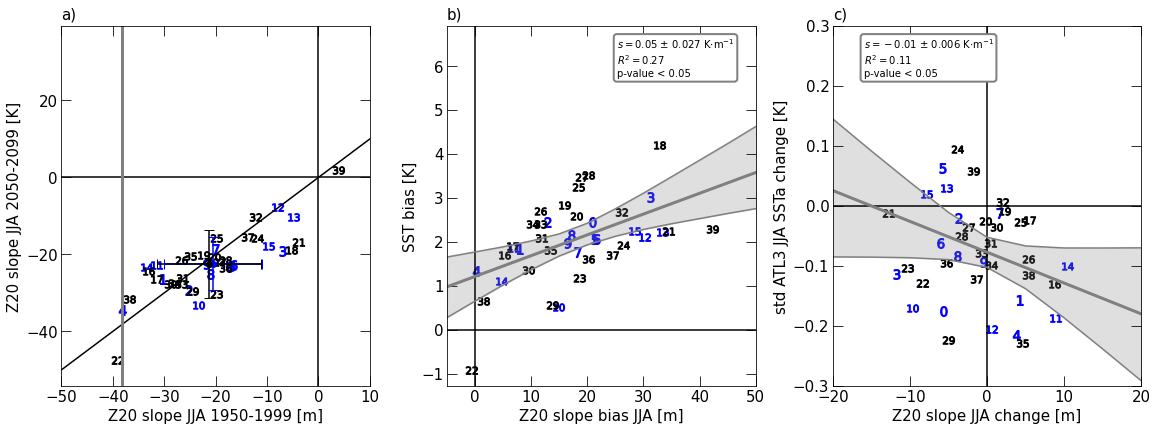

In [29]:
f,ax = plt.subplots(1,3,figsize=[15,5])

ax=ax.ravel()
color_cmip5 = 'black'
color_cmip6 = 'blue'
ftz=15
m_cmip6 = np.arange(0,bias_jja_cmip6.bias.shape[0],1)
m_cmip5 = np.arange(bias_jja_cmip6.bias.shape[0],
                    bias_jja_cmip6.bias.shape[0] + bias_jja_cmip5.bias.shape[0],1)


plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0,
                    wspace=0.25)

x00 = np.arange(-50,40,5)
y00 = x00

ax[0].plot(x00,y00,color='black')
ax[0].axhline(0,color='black')
ax[0].axvline(0,color='black')


for k in range(bias_jja_cmip6.bias.shape[0]):
    if k<10:
        ax[0].scatter(z20_slope_cmip6_jja.period_1[k],z20_slope_cmip6_jja.period_2[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=100)
    else:
        ax[0].scatter(z20_slope_cmip6_jja.period_1[k],z20_slope_cmip6_jja.period_2[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=150)

for i in range(bias_jja_cmip5.bias.shape[0]):
    ax[0].scatter(z20_slope_cmip5_jja.period_1[i],z20_slope_cmip5_jja.period_2[i],color=color_cmip5,
                          marker=r"$ {} $".format(
                m_cmip5[i]),s=150)
    
ax[0].set_ylabel('Z20 slope JJA 2050-2099 [K]',fontsize=ftz)
ax[0].set_xlabel('Z20 slope JJA 1950-1999 [m]',fontsize=ftz)
ax[0].tick_params(labelsize=ftz)
ax[0].axvline(np.round(slope_ORAS4_jja.values,2),color='grey',linewidth=3)
ax[0].set_xlim([-50,10])

ax[0].errorbar(z20_slope_cmip6_jja.period_1.mean(dim='product'),
              z20_slope_cmip6_jja.period_2.mean(dim='product'),
             xerr=z20_slope_cmip6_jja.period_1.std(dim='product'),
             yerr=z20_slope_cmip6_jja.period_2.std(dim='product'),color=color_cmip6,fmt='o',capsize=5)
ax[0].errorbar(z20_slope_cmip5_jja.period_1.mean(dim='product'),
              z20_slope_cmip5_jja.period_2.mean(dim='product'),
             xerr=z20_slope_cmip5_jja.period_1.std(dim='product'),
             yerr=z20_slope_cmip5_jja.period_2.std(dim='product'),color=color_cmip5,fmt='o',capsize=5)



ax[1].axhline(0,color='black')
ax[1].axvline(0,color='black')


for k in range(bias_jja_cmip6.bias.shape[0]):
    if k<10:
        ax[1].scatter(z20_slope_bias_cmip6_jja[k],bias_jja_cmip6.bias[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=100)
    else:
        ax[1].scatter(z20_slope_bias_cmip6_jja[k],bias_jja_cmip6.bias[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=150)

for i in range(bias_jja_cmip5.bias.shape[0]):
    ax[1].scatter(z20_slope_bias_cmip5_jja[i],bias_jja_cmip5.bias[i],color=color_cmip5,
                          marker=r"$ {} $".format(
                m_cmip5[i]),s=150)
    
ax[1].set_ylabel('SST bias [K]',fontsize=ftz)
ax[1].set_xlabel('Z20 slope bias JJA [m]',fontsize=ftz)
ax[1].tick_params(labelsize=ftz)



ax[1].plot(x6, ci_forecast_z20_slope_bias_sst_bias[0], 'grey')
ax[1].plot(x6, ci_forecast_z20_slope_bias_sst_bias[1], 'grey')
ax[1].fill_between(x6,y6,ci_forecast_z20_slope_bias_sst_bias[0],color='grey',alpha=0.25)
ax[1].fill_between(x6,y6,ci_forecast_z20_slope_bias_sst_bias[1],color='grey',alpha=0.25)
ax[1].plot(x6,y6,color='grey',linewidth=3)
ax[1].set_xlim([-5,50])



if p_value6<0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$m$^{-1}$' %
                     (alpha6, std6*ts6),
                     r'$R^{2}=%.2f$' % (r6**2, ),
                    'p-value < 0.05'))
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$m$^{-1}$' %
                     (alpha6, std6*ts6),
                     r'$R^{2}=%.2f$' % (r6**2, ),
                    'p-value > 0.05'))
    
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2)

# place a text box in upper left in axes coords
ax[1].text(0.55,
         0.97,
         textstr,
         transform=ax[1].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)





ax[2].axhline(0,color='black')
ax[2].axvline(0,color='black')
ax[2].plot(x7,y7,color='grey',linewidth=3)

for k in range(bias_jja_cmip6.bias.shape[0]):
    if k<10:
        ax[2].scatter(z20_slope_cmip6_change_jja[k],std_ssta_changes_cmip6[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=100)
    else:
        ax[2].scatter(z20_slope_cmip6_change_jja[k],std_ssta_changes_cmip6[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=150)

for i in range(bias_jja_cmip5.bias.shape[0]):
    ax[2].scatter(z20_slope_cmip5_change_jja[i],std_ssta_changes_cmip5[i],color=color_cmip5,
                          marker=r"$ {} $".format(
                m_cmip5[i]),s=150)
    
ax[2].set_ylabel('std ATL3 JJA SSTa change [K]',fontsize=ftz)
ax[2].set_xlabel('Z20 slope JJA change [m]',fontsize=ftz)
ax[2].tick_params(labelsize=ftz)
ax[2].plot(x7, ci_forecast_z20_slope_change_ssta_change[0], 'grey')
ax[2].plot(x7, ci_forecast_z20_slope_change_ssta_change[1], 'grey')
ax[2].fill_between(x7,y7,ci_forecast_z20_slope_change_ssta_change[0],color='grey',alpha=0.25)
ax[2].fill_between(x7,y7,ci_forecast_z20_slope_change_ssta_change[1],color='grey',alpha=0.25)

ax[2].set_xlim([-20,20])
ax[2].set_ylim([-0.3,0.3])


if p_value7<0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$m$^{-1}$' %
                     (alpha7, std7*ts7),
                     r'$R^{2}=%.2f$' % (r7**2, ),
                    'p-value < 0.05'))
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$m$^{-1}$' %
                     (alpha7, std7*ts7),
                     r'$R^{2}=%.2f$' % (r7**2, ),
                    'p-value > 0.05'))
    
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2)
# place a text box in upper left in axes coords
ax[2].text(0.1,
         0.97,
         textstr,
         transform=ax[2].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)



ax[0].text(0, 1.02, string.ascii_lowercase[0]+')', transform=ax[0].transAxes,
        size=ftz)
ax[1].text(0, 1.02, string.ascii_lowercase[1]+')', transform=ax[1].transAxes,
        size=ftz)
ax[2].text(0, 1.02, string.ascii_lowercase[2]+')', transform=ax[2].transAxes,
        size=ftz)
ax[0].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True,top=True, left=True, right=True,length=10,direction='in')
ax[1].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')
ax[2].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')

plt.savefig(path_fig + 'figure_R5_review.pdf',
            dpi=300, bbox_inches='tight')